<a href="https://colab.research.google.com/github/lopeslyra10/CP-IA/blob/main/ExerciciosCP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False, on_bad_lines='skip')

In [ ]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


**Diferença entre Global_active_power e Global_reactive_power:**

*   **Global_active_power:** É a potência real consumida para realizar trabalho útil. É a energia pela qual você paga.
*   **Global_reactive_power:** É a potência necessária para o funcionamento de equipamentos com campos magnéticos, mas que não realiza trabalho útil.

In [ ]:
# Verificando valores ausentes e quantificando-os
missing_values = df.isnull().sum()
display(missing_values)

,0
Date,1
Time,1
Global_active_power,1
Global_reactive_power,2
Voltage,2
Global_intensity,5
Sub_metering_1,5
Sub_metering_2,6
Sub_metering_3,27


In [ ]:
# Verificando valores ausentes e quantificando-os
missing_values = df.isnull().sum()
display(missing_values)

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [ ]:
# Converter a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Criar uma nova coluna com o dia da semana
df['Day_of_Week'] = df['Date'].dt.day_name()

display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday


In [ ]:
# Filtrar registros apenas do ano de 2007
df_2007 = df[df['Date'].dt.year == 2007].copy()

# Calcular a média de consumo diário de Global_active_power para 2007
daily_avg_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()

# Exibir a média de consumo diário
display(daily_avg_power_2007)

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-03-13,0.895933
2007-03-14,1.245392
2007-03-15,1.308899


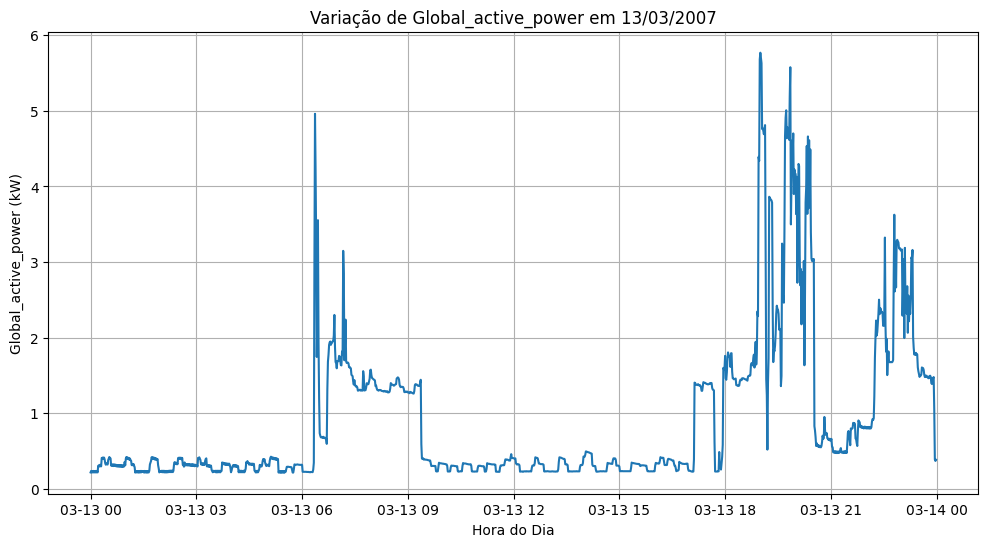

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Selecionar um dia aleatório para visualização
random_date = df['Date'].dropna().sample(1).iloc[0]

# Filtrar os dados para o dia selecionado
df_day = df[df['Date'] == random_date].copy()

# Combinar as colunas Date e Time para criar um índice de tempo
df_day['Datetime'] = pd.to_datetime(df_day['Date'].astype(str) + ' ' + df_day['Time'])
df_day = df_day.set_index('Datetime')

# Converter a coluna Global_active_power para numérico, tratando erros
df_day['Global_active_power'] = pd.to_numeric(df_day['Global_active_power'], errors='coerce')

df_day.dropna(subset=['Global_active_power'], inplace=True)

# Gerar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(df_day.index, df_day['Global_active_power'])
plt.title(f'Variação de Global_active_power em {random_date.strftime("%d/%m/%Y")}')
plt.xlabel('Hora do Dia')
plt.ylabel('Global_active_power (kW)')
plt.grid(True)
plt.show()

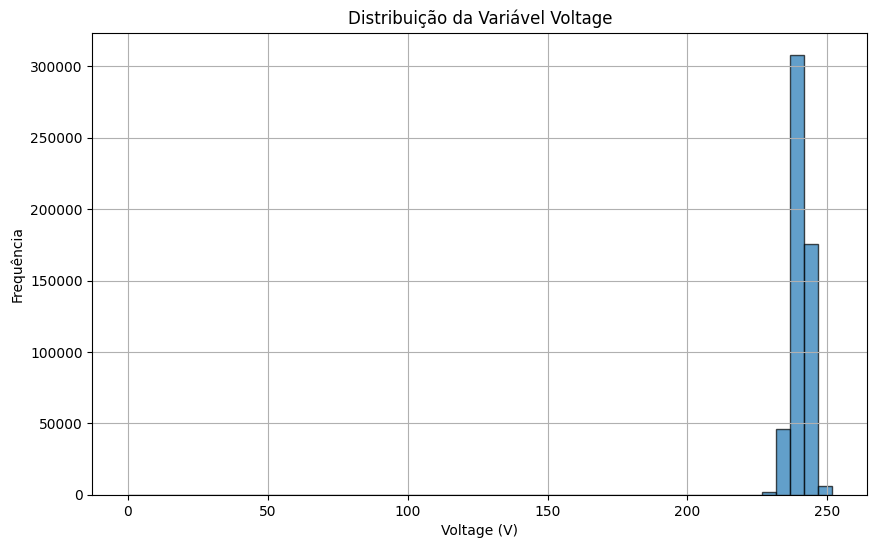

In [ ]:
import matplotlib.pyplot as plt

# Converter a coluna 'Voltage' para numérico, tratando erros
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Remover valores ausentes na coluna 'Voltage' para o histograma
voltage_data = df['Voltage'].dropna()

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(voltage_data, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribuição da Variável Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

**Observações sobre a distribuição da variável Voltage:**

O histograma da variável 'Voltage' mostra que a maioria dos valores está concentrada na faixa de 240 a 250 Volts. Isso indica que a tensão da rede elétrica permaneceu relativamente estável durante o período de medição, com poucas variações significativas. A distribuição parece ser unimodal e aproximadamente simétrica dentro dessa faixa principal.

In [ ]:
# Extrair o ano e o mês da coluna 'Date'
df['YearMonth'] = df['Date'].dt.to_period('M')

# Calcular o consumo médio por mês
monthly_avg_power = df.groupby('YearMonth')['Global_active_power'].mean()

# Exibir o consumo médio mensal
display(monthly_avg_power)

,Global_active_power
YearMonth,
2006-12,1.901064
2007-01,1.545935
2007-02,1.401001
2007-03,1.200024
2008-01,1.473434
2008-02,1.181346
2008-03,1.245286
2008-04,1.115972
2008-05,1.024261


In [ ]:
# Calcular a média diária de Global_active_power
daily_avg_power = df.groupby('Date')['Global_active_power'].mean()

# Encontrar o dia com o maior consumo médio
day_with_highest_consumption = daily_avg_power.idxmax()
highest_consumption_value = daily_avg_power.max()

print(f"O dia com o maior consumo médio de energia ativa global foi {day_with_highest_consumption.strftime('%d/%m/%Y')} com um valor de {highest_consumption_value:.2f} kW.")

O dia com o maior consumo médio de energia ativa global foi 23/12/2006 com um valor de 3.31 kW.


In [ ]:
# Criar uma coluna para indicar se é final de semana ou dia de semana
df['Day_Type'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Calcular o consumo médio por tipo de dia
avg_power_by_day_type = df.groupby('Day_Type')['Global_active_power'].mean()

display(avg_power_by_day_type)

,Global_active_power
Day_Type,
Weekday,1.053758
Weekend,1.314186


In [ ]:
selected_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_selected = df[selected_cols]

for col in selected_cols:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')

correlation_matrix = df_selected.corr()

display(correlation_matrix)

/tmp/ipython-input-2217591018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.241568,-0.504792,0.958287
Global_reactive_power,0.241568,1.000000,-0.141800,0.264818
Voltage,-0.504792,-0.141800,1.000000,-0.501087
Global_intensity,0.958287,0.264818,-0.501087,1.000000


In [ ]:
sub_metering_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in sub_metering_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week,YearMonth,Day_Type,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,2006-12,Weekend,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,2006-12,Weekend,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,2006-12,Weekend,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,2006-12,Weekend,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,2006-12,Weekend,18.0


In [ ]:
monthly_avg_comparison = df.groupby('YearMonth')[['Global_active_power', 'Total_Sub_metering']].mean()

months_exceeding_avg = monthly_avg_comparison[monthly_avg_comparison['Total_Sub_metering'] > monthly_avg_comparison['Global_active_power']]

if not months_exceeding_avg.empty:
    print("Meses em que o Total_Sub_metering ultrapassa a média de Global_active_power:")
    display(months_exceeding_avg)
else:
    print("Não há meses em que o Total_Sub_metering ultrapassa a média de Global_active_power.")

Meses em que o Total_Sub_metering ultrapassa a média de Global_active_power:


,Global_active_power,Total_Sub_metering
YearMonth,,
2006-12,1.901064,10.871880
2007-01,1.545935,10.421972
2007-02,1.401001,9.485974
2007-03,1.200024,9.150895
2008-01,1.473434,9.785292
2008-02,1.181346,8.447196
2008-03,1.245286,9.453851
2008-04,1.115972,9.574745
2008-05,1.024261,9.019108


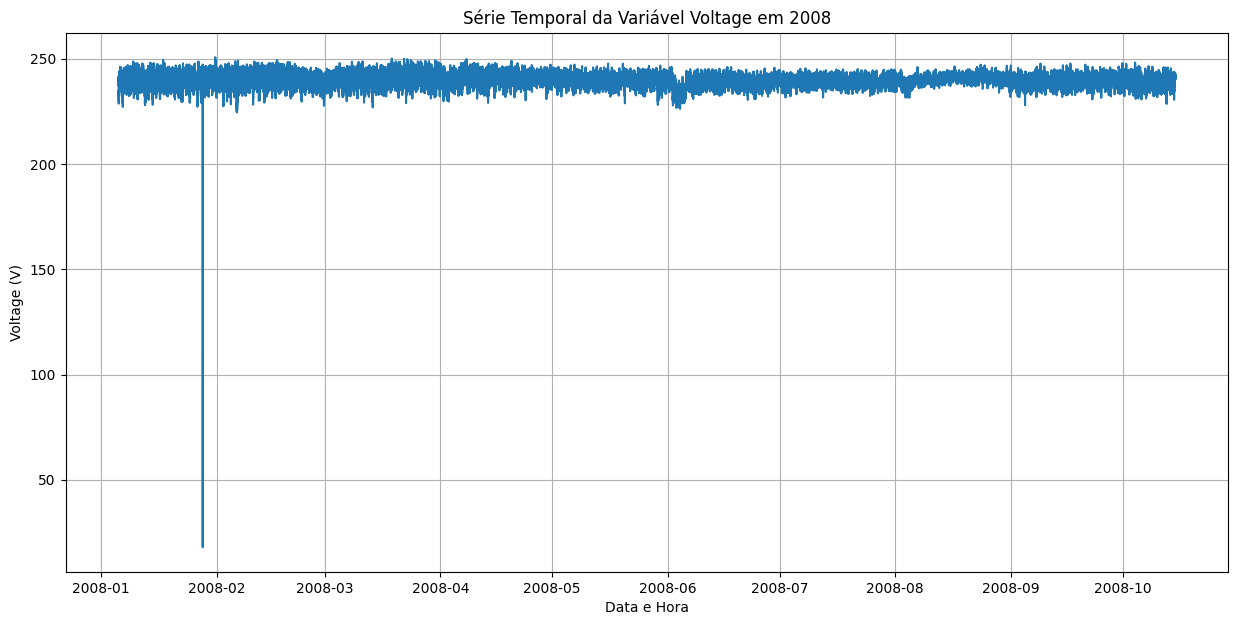

In [ ]:
import matplotlib.pyplot as plt

# Filtrar os dados para o ano de 2008
df_2008 = df[df['Date'].dt.year == 2008].copy()

df_2008['Datetime'] = pd.to_datetime(df_2008['Date'].astype(str) + ' ' + df_2008['Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_2008 = df_2008.set_index('Datetime')

df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')

df_2008.dropna(subset=['Voltage'], inplace=True)

plt.figure(figsize=(15, 7))
plt.plot(df_2008.index, df_2008['Voltage'])
plt.title('Série Temporal da Variável Voltage em 2008')
plt.xlabel('Data e Hora')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

In [ ]:
verao_meses = [6, 7, 8]
inverno_meses = [12, 1, 2]

In [ ]:
df_verao = df[df['Date'].dt.month.isin(verao_meses)].copy()
df_inverno = df[df['Date'].dt.month.isin(inverno_meses)].copy()
display(df_verao.head())
display(df_inverno.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
239436,2007-06-01,00:00:00,0.408,0.196,236.960,1.800,0.000,2.000,0.0
239437,2007-06-01,00:01:00,0.406,0.196,236.810,1.800,0.000,1.000,0.0
239438,2007-06-01,00:02:00,0.404,0.194,236.310,1.800,0.000,2.000,0.0
239439,2007-06-01,00:03:00,0.404,0.196,237.150,1.800,0.000,1.000,0.0
239440,2007-06-01,00:04:00,0.402,0.196,236.960,1.800,0.000,2.000,0.0


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False, on_bad_lines='skip')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
verao_meses = [6, 7, 8]
inverno_meses = [12, 1, 2]
df_verao = df[df['Date'].dt.month.isin(verao_meses)].copy()
df_inverno = df[df['Date'].dt.month.isin(inverno_meses)].copy()
display(df_verao.head())
display(df_inverno.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
239436,2007-06-01,00:00:00,0.408,0.196,236.960,1.800,0.000,2.000,0.0
239437,2007-06-01,00:01:00,0.406,0.196,236.810,1.800,0.000,1.000,0.0
239438,2007-06-01,00:02:00,0.404,0.194,236.310,1.800,0.000,2.000,0.0
239439,2007-06-01,00:03:00,0.404,0.196,237.150,1.800,0.000,1.000,0.0
239440,2007-06-01,00:04:00,0.402,0.196,236.960,1.800,0.000,2.000,0.0


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
import pandas as pd

df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False, on_bad_lines='skip')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
verao_meses = [6, 7, 8]
inverno_meses = [12, 1, 2]
df_summer = df[df['Date'].dt.month.isin(verao_meses)].copy()
df_winter = df[df['Date'].dt.month.isin(inverno_meses)].copy()
display(df_verao.head())
display(df_inverno.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
239436,2007-06-01,00:00:00,0.408,0.196,236.960,1.800,0.000,2.000,0.0
239437,2007-06-01,00:01:00,0.406,0.196,236.810,1.800,0.000,1.000,0.0
239438,2007-06-01,00:02:00,0.404,0.194,236.310,1.800,0.000,2.000,0.0
239439,2007-06-01,00:03:00,0.404,0.196,237.150,1.800,0.000,1.000,0.0
239440,2007-06-01,00:04:00,0.402,0.196,236.960,1.800,0.000,2.000,0.0


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df_verao['Global_active_power'] = pd.to_numeric(df_summer['Global_active_power'], errors='coerce')
df_inverno['Global_active_power'] = pd.to_numeric(df_winter['Global_active_power'], errors='coerce')
average_summer_consumption = df_summer['Global_active_power'].mean()
average_winter_consumption = df_winter['Global_active_power'].mean()

In [ ]:
print(f"Average Global_active_power consumption in Summer: {average_summer_consumption:.2f} kW")
print(f"Average Global_active_power consumption in Winter: {average_winter_consumption:.2f} kW")

if average_winter_consumption > average_summer_consumption:
    print("Winter has a higher average Global_active_power consumption than Summer.")
elif average_summer_consumption > average_winter_consumption:
    print("Summer has a higher average Global_active_power consumption than Winter.")
else:
    print("The average Global_active_power consumption is the same for Summer and Winter.")

Average Global_active_power consumption in Summer: 0.73 kW
Average Global_active_power consumption in Winter: 1.42 kW
Winter has a higher average Global_active_power consumption than Summer.


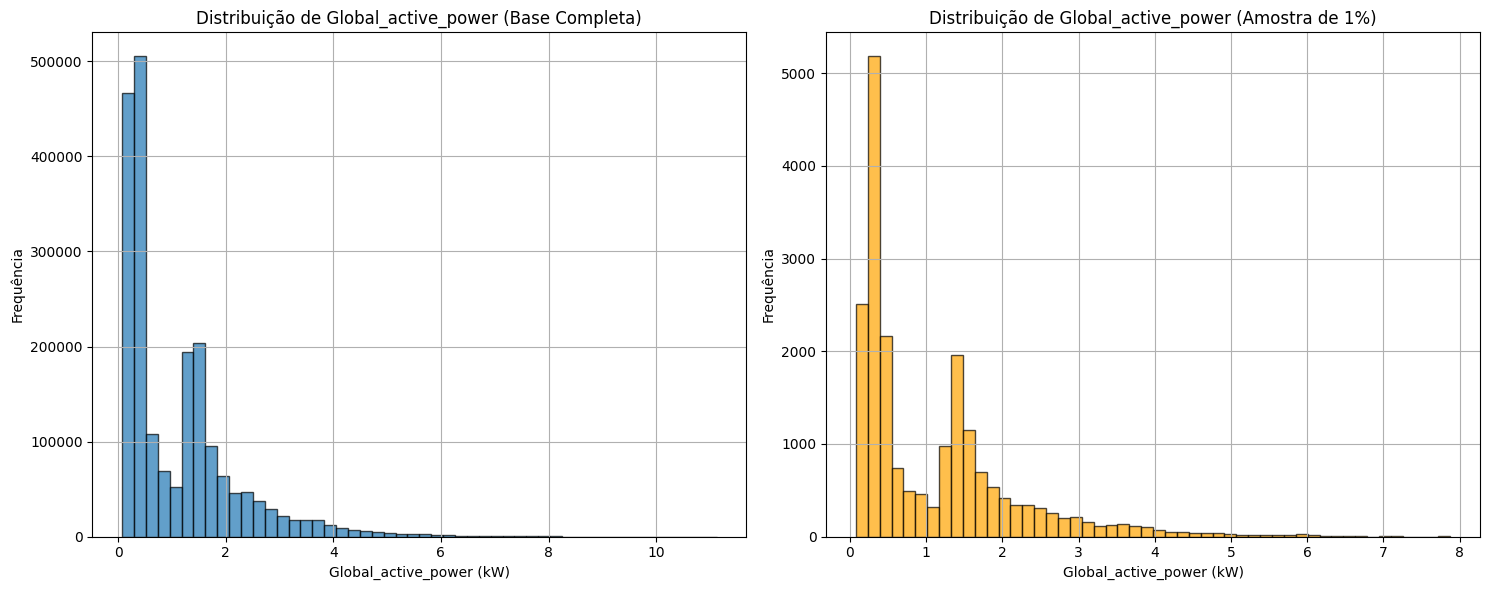

In [ ]:
df_amostra = df.sample(frac=0.01, random_state=42)

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_amostra['Global_active_power'] = pd.to_numeric(df_amostra['Global_active_power'], errors='coerce')

dados_potencia_global = df['Global_active_power'].dropna()
dados_potencia_global_amostra = df_amostra['Global_active_power'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].hist(dados_potencia_global, bins=50, edgecolor='k', alpha=0.7)
axes[0].set_title('Distribuição de Global_active_power (Base Completa)')
axes[0].set_xlabel('Global_active_power (kW)')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)

axes[1].hist(dados_potencia_global_amostra, bins=50, edgecolor='k', alpha=0.7, color='orange')
axes[1].set_title('Distribuição de Global_active_power (Amostra de 1%)')
axes[1].set_xlabel('Global_active_power (kW)')
axes[1].set_ylabel('Frequência')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df_numerical = df[numerical_cols].copy()

for col in numerical_cols:
    df_numerical[col] = pd.to_numeric(df_numerical[col], errors='coerce')

df_numerical.dropna(inplace=True)

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_numerical)

df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

display(df_scaled.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387


Cluster Centers (Average Global_active_power):
[[ 887.86984821]
 [2463.98514925]
 [1623.84455923]]

Number of days in each cluster:
cluster
2    728
0    449
1    265
Name: count, dtype: int64


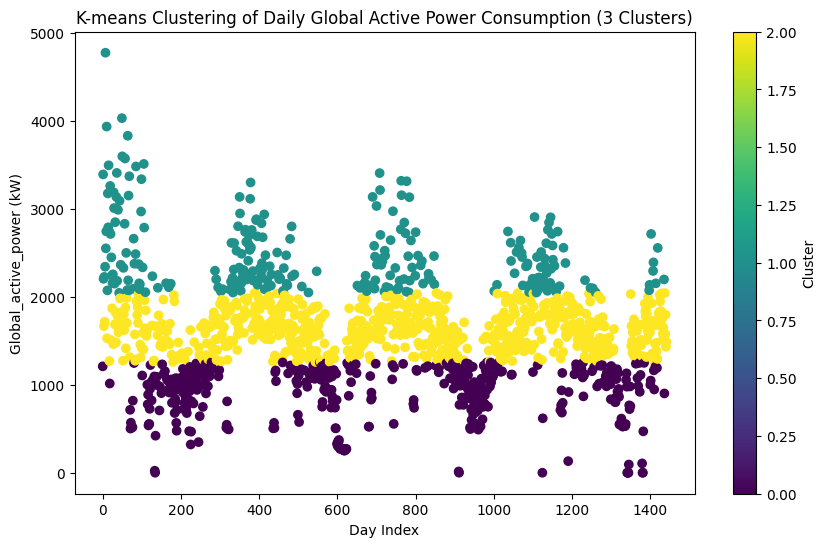

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

daily_power_consumption = df.groupby('Date')['Global_active_power'].sum().reset_index()

daily_power_consumption.dropna(inplace=True)

X = daily_power_consumption[['Global_active_power']]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily_power_consumption['cluster'] = kmeans.fit_predict(X)

cluster_centers = kmeans.cluster_centers_
print("Cluster Centers (Average Global_active_power):")
print(cluster_centers)

print("\nNumber of days in each cluster:")
print(daily_power_consumption['cluster'].value_counts())

plt.figure(figsize=(10, 6))
plt.scatter(daily_power_consumption.index, daily_power_consumption['Global_active_power'], c=daily_power_consumption['cluster'], cmap='viridis')
plt.title('K-means Clustering of Daily Global Active Power Consumption (3 Clusters)')
plt.xlabel('Day Index')
plt.ylabel('Global_active_power (kW)')
plt.colorbar(label='Cluster')
plt.show()

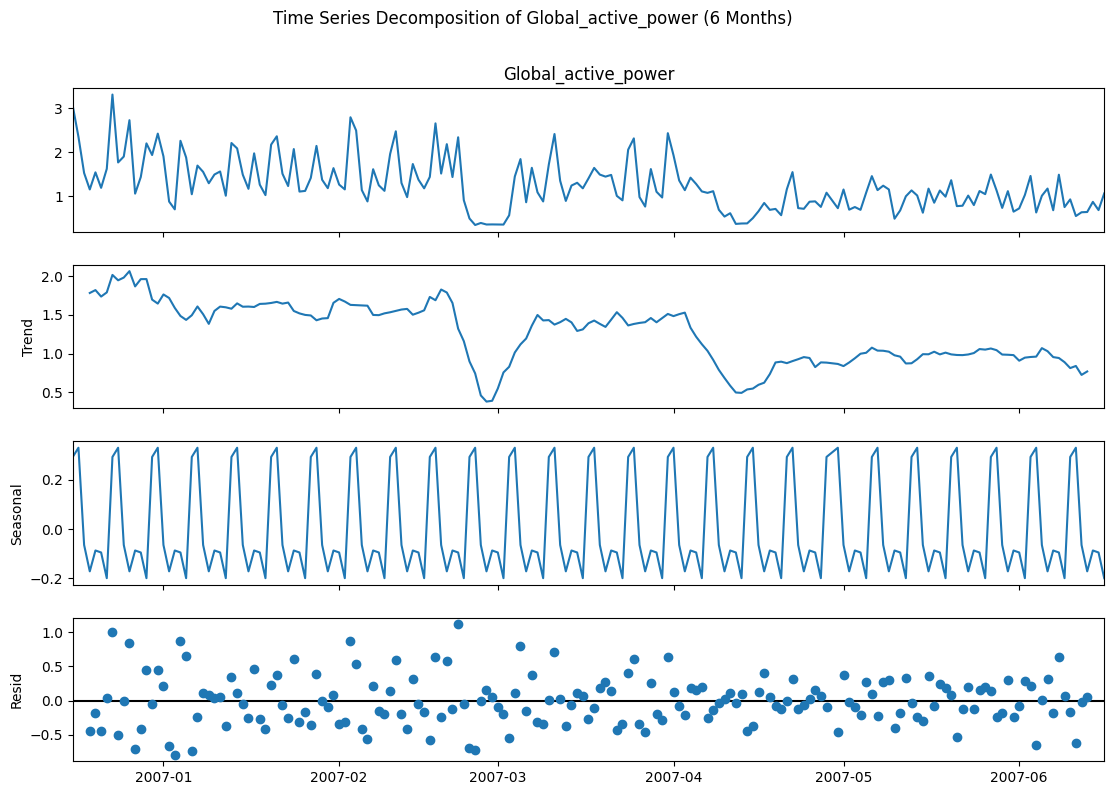

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df = df.set_index('Datetime')

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_decomposition = df['Global_active_power'].dropna()

if len(df_decomposition) > 0:
    start_date = df_decomposition.index[0]
    end_date = start_date + pd.DateOffset(months=6)
    df_6months = df_decomposition.loc[start_date:end_date]

    df_daily = df_6months.resample('D').mean().dropna()

    if len(df_daily) > 1:
        decomposition = seasonal_decompose(df_daily, model='additive', period=7)

        fig = decomposition.plot()
        fig.set_size_inches(12, 8)
        plt.suptitle('Time Series Decomposition of Global_active_power (6 Months)', y=1.02)
        plt.show()
    else:
        print("Não há dados suficientes após o resampling para realizar a decomposição.")
else:
    print("Não há dados válidos na coluna Global_active_power para realizar a decomposição.")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

df_cleaned = df[['Global_active_power', 'Global_intensity']].dropna()

X = df_cleaned[['Global_intensity']]
y = df_cleaned['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Quadrático Médio (MSE): 0.00
Coeficiente de Determinação (R²): 1.00


**PARTE 2**

In [12]:
# 1. Converter Date e Time em índice datetime

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')
df = df.set_index('Datetime')
df.dropna(subset=['Global_active_power'], inplace=True)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')


df_hourly = df['Global_active_power'].resample('h').mean()

df_hourly.dropna(inplace=True)

df_hourly = df_hourly.to_frame()
df_hourly['Hour'] = df_hourly.index.hour

hourly_avg_consumption = df_hourly.groupby('Hour')['Global_active_power'].mean()

top_hours = hourly_avg_consumption.nlargest(3)

print("Horários de maior consumo médio de Global_active_power ao longo do dia:")
display(top_hours)

Horários de maior consumo médio de Global_active_power ao longo do dia:


,Global_active_power
Hour,
21,2.016543
20,1.907610
19,1.842419


In [13]:
#22. Autocorrelação do consumo

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

acf_values = acf(df_hourly['Global_active_power'], nlags=48)

print(f"Autocorrelação no lag de 1 hora: {acf_values[1]:.2f}")
print(f"Autocorrelação no lag de 24 horas: {acf_values[24]:.2f}")
print(f"Autocorrelação no lag de 48 horas: {acf_values[48]:.2f}")

print("\nResposta à pergunta 'existem padrões repetidos diariamente?':")
if acf_values[24] > 0.5 and acf_values[48] > 0.5:
    print("Sim, os altos valores de autocorrelação nos lags de 24 e 48 horas sugerem a presença de padrões diários repetidos no consumo de Global_active_power.")
else:
    print("Os valores de autocorrelação nos lags de 24 e 48 horas não são altos o suficiente para indicar claramente padrões diários repetidos.")


Autocorrelação no lag de 1 hora: 0.74
Autocorrelação no lag de 24 horas: 0.42
Autocorrelação no lag de 48 horas: 0.37

Resposta à pergunta 'existem padrões repetidos diariamente?':
Os valores de autocorrelação nos lags de 24 e 48 horas não são altos o suficiente para indicar claramente padrões diários repetidos.


In [18]:
#23. Redução de dimensionalidade com PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

selected_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca_data = df[selected_cols].copy()

for col in selected_cols:
    df_pca_data[col] = pd.to_numeric(df_pca_data[col], errors='coerce')
df_pca_data.dropna(inplace=True)

scaler = StandardScaler()
df_scaled_pca = scaler.fit_transform(df_pca_data)
df_scaled_pca = pd.DataFrame(df_scaled_pca, columns=df_pca_data.columns, index=df_pca_data.index)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled_pca)
df_principal_components = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'], index=df_scaled_pca.index)

explained_variance_ratio = pca.explained_variance_ratio_
print("Variância explicada por cada componente principal:")
print(f"Componente Principal 1: {explained_variance_ratio[0]:.4f}")
print(f"Componente Principal 2: {explained_variance_ratio[1]:.4f}")
print(f"Variância total explicada pelos 2 componentes: {explained_variance_ratio.sum():.4f}")


Variância explicada por cada componente principal:
Componente Principal 1: 0.5799
Componente Principal 2: 0.2313
Variância total explicada pelos 2 componentes: 0.8112


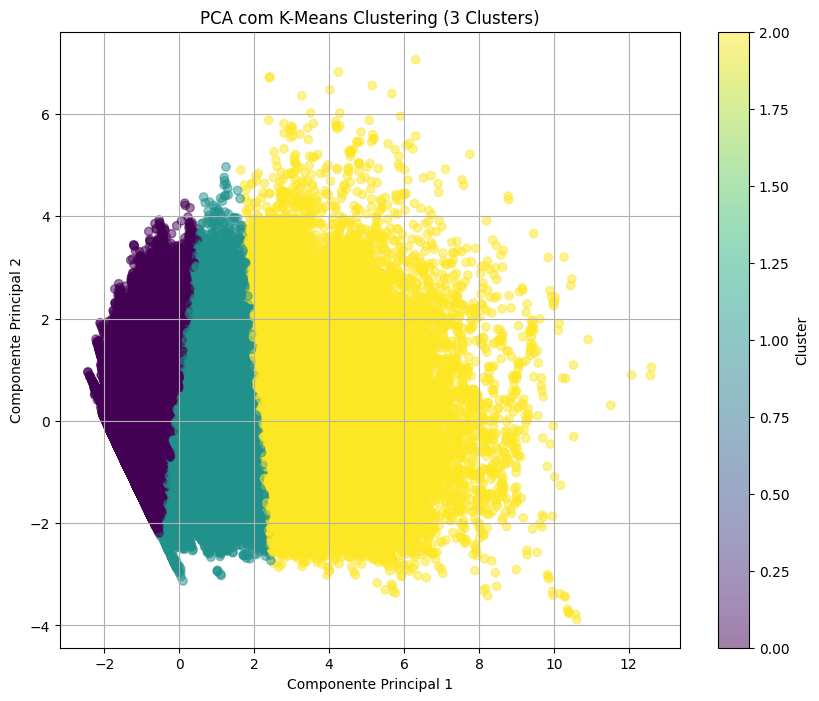


Resposta à pergunta 'os grupos se separam de forma clara?':
Observando o gráfico de dispersão, podemos ver se os 3 grupos formados pelo K-Means se separam de forma clara no espaço dos dois primeiros componentes principais do PCA.
A clareza da separação dependerá da distribuição dos pontos no gráfico.


In [19]:
# 24. Visualização de clusters no espaço PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_principal_components)

df_principal_components['cluster'] = clusters

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_principal_components['Principal Component 1'], df_principal_components['Principal Component 2'], c=df_principal_components['cluster'], cmap='viridis', alpha=0.5)
plt.title('PCA com K-Means Clustering (3 Clusters)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# Pergunta: os grupos se separam de forma clara?
print("\nResposta à pergunta 'os grupos se separam de forma clara?':")
# Analisar visualmente o gráfico para responder à pergunta.
# Em geral, se os clusters estiverem bem separados no gráfico, a resposta é sim.
# Se houver muita sobreposição, a separação não é clara.
print("Observando o gráfico de dispersão, podemos ver se os 3 grupos formados pelo K-Means se separam de forma clara no espaço dos dois primeiros componentes principais do PCA.")
print("A clareza da separação dependerá da distribuição dos pontos no gráfico.")

RMSE da Regressão Linear Simples: 1.0752
RMSE da Regressão Polinomial (Grau 2): 1.0721


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


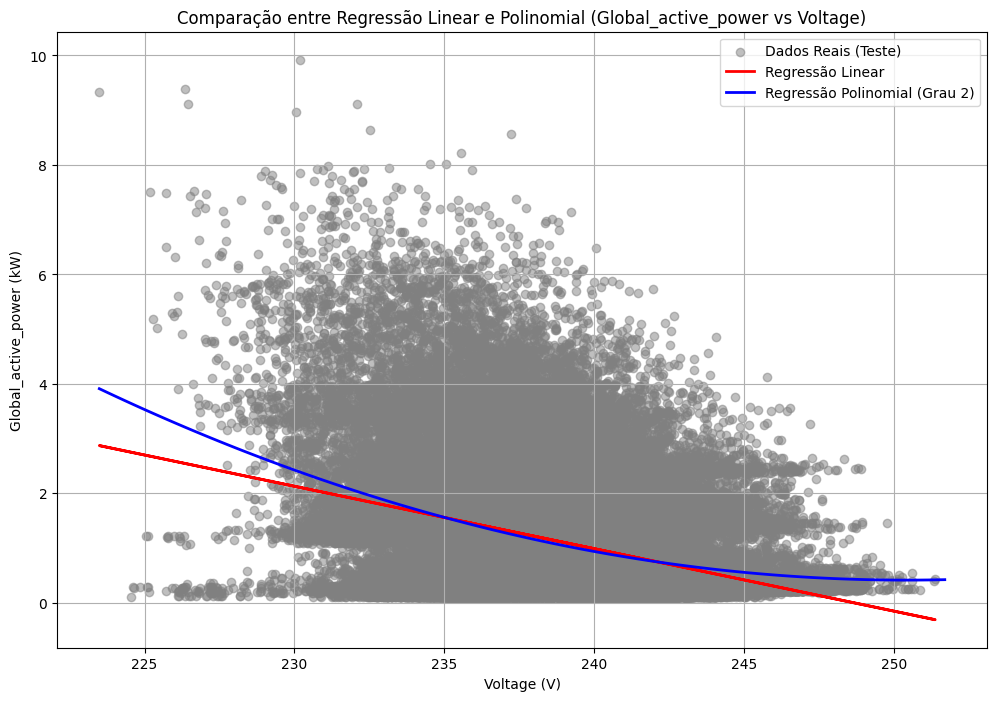


Análise do Erro e da Curva Ajustada:
A Regressão Polinomial (Grau 2) apresentou um RMSE menor, indicando um ajuste melhor aos dados de teste em comparação com a Regressão Linear Simples.
Observe o gráfico para visualizar como cada curva de regressão se ajusta aos pontos de dados de teste.


In [20]:
#25. Regressão polinomial vs linear
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

selected_cols = ['Global_active_power', 'Voltage']
df_regression_data = df[selected_cols].copy()

for col in selected_cols:
    df_regression_data[col] = pd.to_numeric(df_regression_data[col], errors='coerce')
df_regression_data.dropna(inplace=True)

X = df_regression_data[['Voltage']]
y = df_regression_data['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Regressão Linear Simples
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"RMSE da Regressão Linear Simples: {rmse_linear:.4f}")

# Criar features polinomiais de grau 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Treinar o modelo de regressão linear nos features polinomiais
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)
y_pred_polynomial = polynomial_model.predict(X_test_poly)
rmse_polynomial = np.sqrt(mean_squared_error(y_test, y_pred_polynomial))

print(f"RMSE da Regressão Polinomial (Grau 2): {rmse_polynomial:.4f}")

plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='gray', label='Dados Reais (Teste)', alpha=0.5)

plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Regressão Linear')

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_pred_range_polynomial = polynomial_model.predict(X_range_poly)
plt.plot(X_range, y_pred_range_polynomial, color='blue', linewidth=2, label='Regressão Polinomial (Grau 2)')

plt.title('Comparação entre Regressão Linear e Polinomial (Global_active_power vs Voltage)')
plt.xlabel('Voltage (V)')
plt.ylabel('Global_active_power (kW)')
plt.legend()
plt.grid(True)
plt.show()

# Análise e Conclusão
print("\nAnálise do Erro e da Curva Ajustada:")
if rmse_polynomial < rmse_linear:
    print("A Regressão Polinomial (Grau 2) apresentou um RMSE menor, indicando um ajuste melhor aos dados de teste em comparação com a Regressão Linear Simples.")
else:
    print("A Regressão Linear Simples apresentou um RMSE menor ou igual, indicando um ajuste melhor ou semelhante aos dados de teste.")

print("Observe o gráfico para visualizar como cada curva de regressão se ajusta aos pontos de dados de teste.")

In [23]:
##26. Carregamento e inspeção inicial
import pandas as pd

# Carregar o dataset
df_energy = pd.read_csv('/content/energydata_complete.csv')

# Listar tipos de dados e informações gerais
print("Informações sobre o dataset:")
display(df_energy.info())

# Exibir estatísticas descritivas
print("\nEstatísticas descritivas do dataset:")
display(df_energy.describe())

Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         1973

None


Estatísticas descritivas do dataset:


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


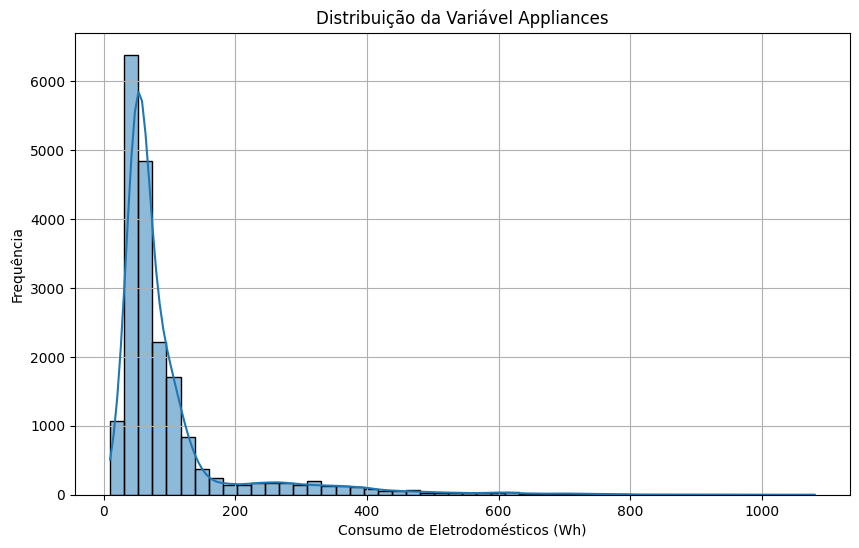

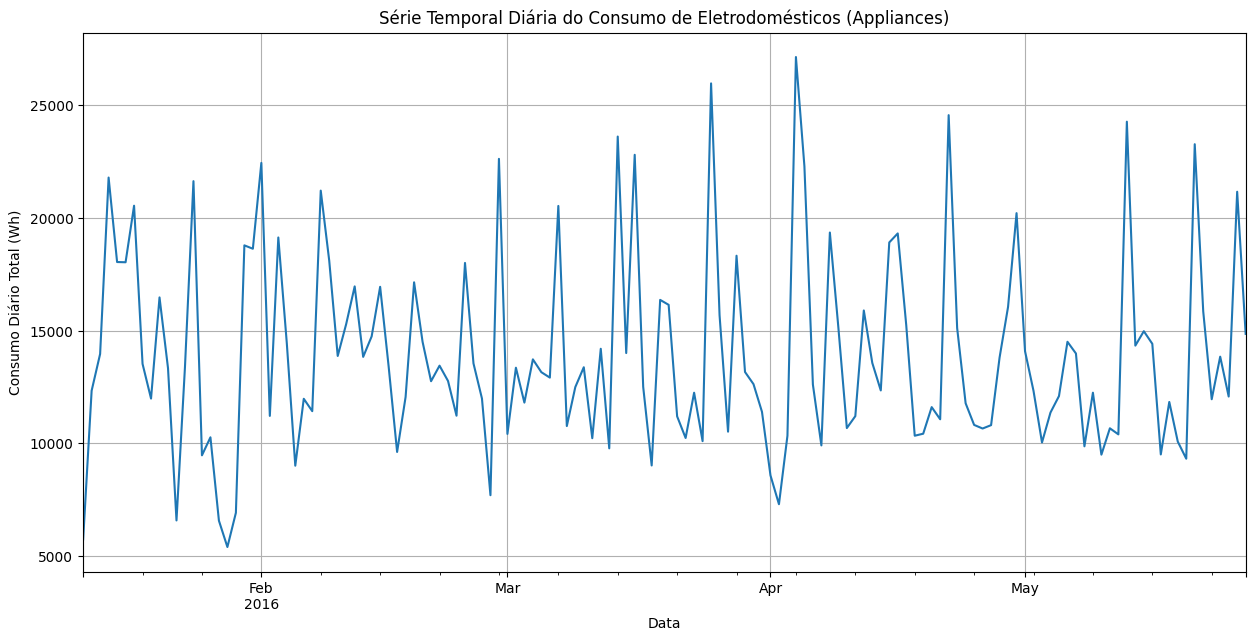


Resposta à pergunta 'o consumo tende a se concentrar em valores baixos ou altos?':
Observando o histograma, podemos ver a distribuição dos valores de consumo de eletrodomésticos.
A concentração dos dados (se em valores baixos, altos ou distribuída de outra forma) será evidente no formato do histograma.


In [27]:
# 27. Distribuição do consumo
plt.figure(figsize=(10, 6))
sns.histplot(df_energy['Appliances'], bins=50, kde=True)
plt.title('Distribuição da Variável Appliances')
plt.xlabel('Consumo de Eletrodomésticos (Wh)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Converter a coluna 'date' para datetime para a série temporal
df_energy['date'] = pd.to_datetime(df_energy['date'])
df_daily_appliances = df_energy.resample('D', on='date')['Appliances'].sum()


plt.figure(figsize=(15, 7))
df_daily_appliances.plot()
plt.title('Série Temporal Diária do Consumo de Eletrodomésticos (Appliances)')
plt.xlabel('Data')
plt.ylabel('Consumo Diário Total (Wh)')
plt.grid(True)
plt.show()

# Pergunta: o consumo tende a se concentrar em valores baixos ou altos?
print("\nResposta à pergunta 'o consumo tende a se concentrar em valores baixos ou altos?':")
# Analisar visualmente o histograma para responder.
# Se a maioria das barras estiver à esquerda, o consumo se concentra em valores baixos.
# Se a maioria das barras estiver à direita, o consumo se concentra em valores altos.
# Se for uma distribuição mais uniforme ou multimodal, a resposta pode ser diferente.
print("Observando o histograma, podemos ver a distribuição dos valores de consumo de eletrodomésticos.")
print("A concentração dos dados (se em valores baixos, altos ou distribuída de outra forma) será evidente no formato do histograma.")

In [26]:
# 28. Correlações com variáveis ambientais

environmental_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
                     'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Tdewpoint']

cols_to_correlate = ['Appliances'] + environmental_cols
df_corr_data = df_energy[cols_to_correlate].copy()
correlation_matrix = df_corr_data.corr()
appliances_correlations = correlation_matrix['Appliances'].sort_values(ascending=False)

print("Correlações entre Appliances e variáveis ambientais:")
display(appliances_correlations)

# Pergunta: quais fatores têm mais relação com o consumo?
print("\nResposta à pergunta 'quais fatores têm mais relação com o consumo?':")
# Analisar os valores de correlação para identificar as variáveis com os maiores valores absolutos.
# Valores próximos a 1 ou -1 indicam forte relação (positiva ou negativa).
print("Observando os valores de correlação acima, podemos identificar as variáveis ambientais que apresentam os maiores coeficientes de correlação (em valor absoluto) com a variável 'Appliances'.")
print("Variáveis com valores de correlação mais próximos de 1 ou -1 têm uma relação mais forte com o consumo de eletrodomésticos.")

Correlações entre Appliances e variáveis ambientais:


,Appliances
Appliances,1.000000
T2,0.120073
T6,0.117638
T_out,0.099155
RH_1,0.086031
T3,0.085060
T1,0.055447
T4,0.040281
T8,0.039572
RH_3,0.036292



Resposta à pergunta 'quais fatores têm mais relação com o consumo?':
Observando os valores de correlação acima, podemos identificar as variáveis ambientais que apresentam os maiores coeficientes de correlação (em valor absoluto) com a variável 'Appliances'.
Variáveis com valores de correlação mais próximos de 1 ou -1 têm uma relação mais forte com o consumo de eletrodomésticos.


In [31]:
# 29. Normalização dos dados

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
numerical_cols = df_energy.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'date' in numerical_cols:
    numerical_cols.remove('date')

df_numerical = df_energy[numerical_cols].copy()

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_numerical)

df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

print("Primeiras 5 linhas do DataFrame com dados normalizados:")
display(df_scaled.head())


Primeiras 5 linhas do DataFrame com dados normalizados:


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


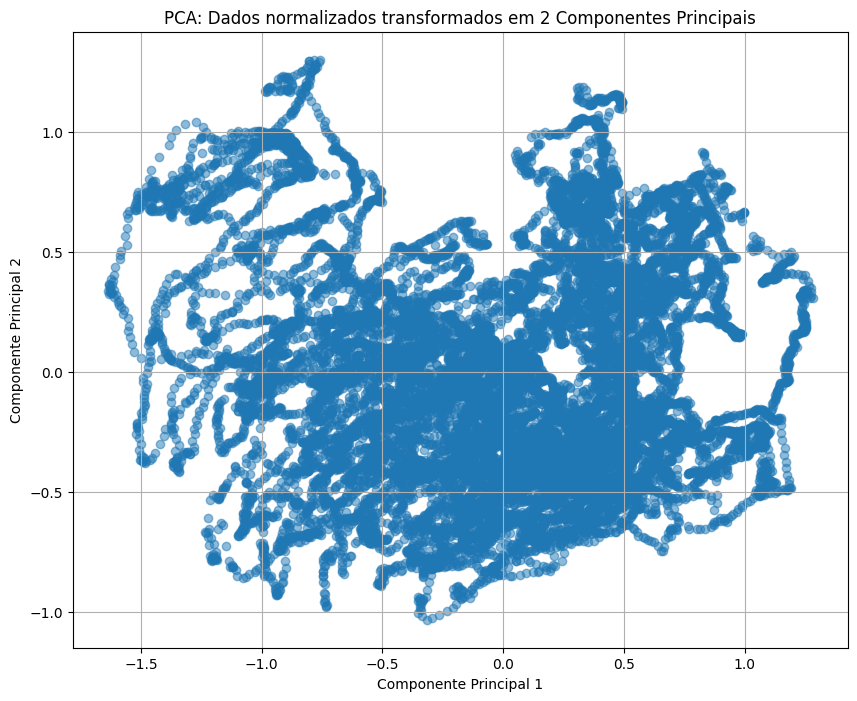


Resposta à pergunta 'aparecem padrões ou agrupamentos naturais?':
Observando o gráfico de dispersão dos dois primeiros componentes principais, podemos procurar por agrupamentos de pontos ou padrões visuais que sugiram estruturas naturais nos dados normalizados.
A presença ou ausência de padrões/agrupamentos será visível na distribuição dos pontos no gráfico.


In [32]:
# 30. PCA nos dados normalizados
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_scaled = PCA(n_components=2)
principal_components_scaled = pca_scaled.fit_transform(df_scaled)
df_principal_components_scaled = pd.DataFrame(data = principal_components_scaled, columns = ['Principal Component 1', 'Principal Component 2'], index=df_scaled.index)

# Plote os dados resultantes.
plt.figure(figsize=(10, 8))
plt.scatter(df_principal_components_scaled['Principal Component 1'], df_principal_components_scaled['Principal Component 2'], alpha=0.5)
plt.title('PCA: Dados normalizados transformados em 2 Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Pergunta: aparecem padrões ou agrupamentos naturais?
print("\nResposta à pergunta 'aparecem padrões ou agrupamentos naturais?':")
# Analisar visualmente o gráfico para responder.
# Se os pontos se agruparem em regiões distintas, há agrupamentos naturais.
# Se os pontos formarem padrões visuais (linhas, curvas, etc.), há padrões.
# Se os pontos estiverem espalhados aleatoriamente, pode não haver padrões claros em 2D.
print("Observando o gráfico de dispersão dos dois primeiros componentes principais, podemos procurar por agrupamentos de pontos ou padrões visuais que sugiram estruturas naturais nos dados normalizados.")
print("A presença ou ausência de padrões/agrupamentos será visível na distribuição dos pontos no gráfico.")

In [33]:
# 31. Regressão Linear Múltipla
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

environmental_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
                     'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Tdewpoint']

target_col = 'Appliances'

X = df_scaled[environmental_cols]
y = df_scaled[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Erro Quadrático Médio (MSE): 0.0075
Raiz do Erro Quadrático Médio (RMSE): 0.0865
Coeficiente de Determinação (R²): 0.1440


In [38]:
# 32. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"RMSE do Random Forest Regressor: {rmse_rf:.4f}")
print(f"RMSE da Regressão Linear Múltipla: {rmse:.4f}")

if rmse_rf < rmse:
    print("\nO modelo Random Forest Regressor apresentou um RMSE menor do que a Regressão Linear Múltipla, indicando um melhor desempenho nos dados de teste.")
elif rmse_rf > rmse:
    print("\nO modelo Random Forest Regressor apresentou um RMSE maior do que a Regressão Linear Múltipla.")
else:
    print("\nO RMSE dos modelos Random Forest Regressor e Regressão Linear Múltipla são iguais.")

RMSE do Random Forest Regressor: 0.0596
RMSE da Regressão Linear Múltipla: 0.0865

O modelo Random Forest Regressor apresentou um RMSE menor do que a Regressão Linear Múltipla, indicando um melhor desempenho nos dados de teste.


In [36]:
# 33. K-Means clustering
n_clusters_range = range(3, 6)

for n_clusters in n_clusters_range:
    print(f"\nAplicando K-Means com {n_clusters} clusters:")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_scaled)

    cluster_centers_scaled = kmeans.cluster_centers_
    df_cluster_centers_scaled = pd.DataFrame(cluster_centers_scaled, columns=df_scaled.columns)

    print(f"Centros dos Clusters ({n_clusters} clusters - dados normalizados):")
    display(df_cluster_centers_scaled)

    print(f"\nPara interpretar os perfis de consumo com {n_clusters} clusters, analise os valores nos centros dos clusters acima.")
    print("Valores mais altos indicam maior intensidade daquela variável no cluster.")

# Pergunta: Interprete os perfis de consumo.
print("\nResposta à pergunta 'Interprete os perfis de consumo':")
print("Após executar as células acima, analise os centros dos clusters para cada número de clusters (3 a 5).")
print("Compare os valores médios das variáveis (representados pelos centros) entre os diferentes clusters para entender as características de cada grupo de consumo.")
print("Por exemplo, um cluster pode ter valores altos para 'Appliances' e certas temperaturas, sugerindo um perfil de alto consumo em condições específicas.")


Aplicando K-Means com 3 clusters:
Centros dos Clusters (3 clusters - dados normalizados):


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.091612,0.033320,0.690972,0.391746,0.474135,0.554040,0.603089,0.471597,0.718858,0.498484,...,0.716212,0.518177,0.583278,0.585252,0.599759,0.268233,0.553962,0.622476,0.494396,0.494396
1,0.075826,0.052919,0.443548,0.296596,0.208192,0.529522,0.348582,0.401714,0.452907,0.361697,...,0.410752,0.410898,0.285580,0.642092,0.766123,0.230830,0.580460,0.339636,0.503257,0.503257
2,0.080943,0.084097,0.429575,0.455424,0.281079,0.629661,0.321035,0.677475,0.381940,0.699020,...,0.296516,0.696041,0.373187,0.581229,0.845790,0.422946,0.589180,0.511757,0.500081,0.500081



Para interpretar os perfis de consumo com 3 clusters, analise os valores nos centros dos clusters acima.
Valores mais altos indicam maior intensidade daquela variável no cluster.

Aplicando K-Means com 4 clusters:
Centros dos Clusters (4 clusters - dados normalizados):


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.092068,0.032413,0.711213,0.398596,0.495945,0.554128,0.620087,0.479434,0.740349,0.509599,...,0.738638,0.528886,0.602701,0.581285,0.592934,0.262721,0.553552,0.642073,0.499846,0.499846
1,0.077347,0.054056,0.455570,0.308641,0.223585,0.536965,0.361614,0.416961,0.461595,0.382755,...,0.421863,0.426234,0.300840,0.625402,0.766992,0.244299,0.578719,0.361011,0.767975,0.767975
2,0.078961,0.081377,0.417404,0.463817,0.277230,0.635108,0.311245,0.692096,0.371048,0.718889,...,0.281072,0.718065,0.379089,0.600398,0.847618,0.428390,0.587295,0.521096,0.494182,0.494182
3,0.078697,0.055524,0.460322,0.307327,0.227706,0.534642,0.365212,0.414079,0.466576,0.379927,...,0.425713,0.421953,0.307220,0.630475,0.752996,0.249500,0.580758,0.360605,0.235960,0.235960



Para interpretar os perfis de consumo com 4 clusters, analise os valores nos centros dos clusters acima.
Valores mais altos indicam maior intensidade daquela variável no cluster.

Aplicando K-Means com 5 clusters:
Centros dos Clusters (5 clusters - dados normalizados):


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.099570,0.038169,0.618273,0.302724,0.430376,0.452979,0.506841,0.377502,0.645142,0.364336,...,0.612017,0.389939,0.536722,0.655848,0.481799,0.308694,0.559485,0.473794,0.483195,0.483195
1,0.074929,0.054476,0.447372,0.314583,0.214071,0.546641,0.354179,0.428725,0.449316,0.395452,...,0.410214,0.437809,0.286369,0.611424,0.796005,0.240667,0.583244,0.360591,0.774070,0.774070
2,0.079057,0.083617,0.416793,0.470465,0.278695,0.640903,0.310314,0.702761,0.370648,0.733549,...,0.275226,0.731328,0.388526,0.611619,0.844987,0.439805,0.585657,0.532676,0.500026,0.500026
3,0.075023,0.057161,0.445372,0.316145,0.213489,0.547830,0.351572,0.432631,0.447152,0.398214,...,0.405779,0.438346,0.285004,0.610264,0.793849,0.242299,0.587756,0.357522,0.234621,0.234621
4,0.085448,0.031681,0.762165,0.480945,0.510504,0.657005,0.693886,0.566998,0.791215,0.631321,...,0.816944,0.653712,0.619861,0.537147,0.724076,0.218080,0.540119,0.765320,0.507746,0.507746



Para interpretar os perfis de consumo com 5 clusters, analise os valores nos centros dos clusters acima.
Valores mais altos indicam maior intensidade daquela variável no cluster.

Resposta à pergunta 'Interprete os perfis de consumo':
Após executar as células acima, analise os centros dos clusters para cada número de clusters (3 a 5).
Compare os valores médios das variáveis (representados pelos centros) entre os diferentes clusters para entender as características de cada grupo de consumo.
Por exemplo, um cluster pode ter valores altos para 'Appliances' e certas temperaturas, sugerindo um perfil de alto consumo em condições específicas.


Treinando modelo de Regressão Logística...
Treinando modelo Random Forest Classifier...

Avaliação do Modelo de Regressão Logística:
Acurácia: 0.7352
Precisão: 0.7050
Recall: 0.7202
F1-Score: 0.7125
AUC: 0.8082


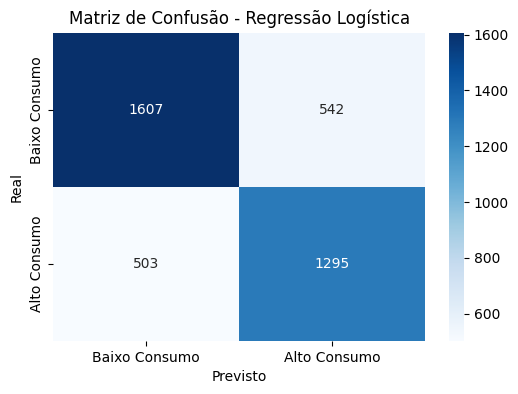


Avaliação do Modelo Random Forest Classifier:
Acurácia: 0.9014
Precisão: 0.8996
Recall: 0.8821
F1-Score: 0.8908
AUC: 0.9582


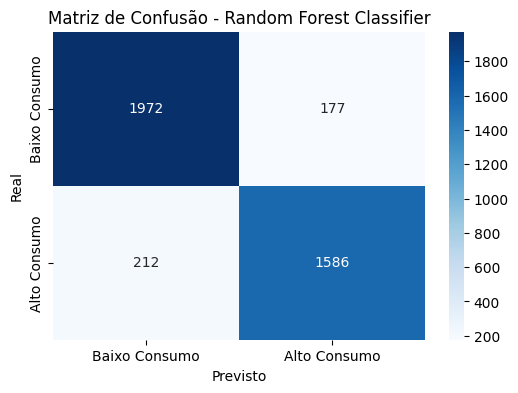


Comparação dos Modelos:
As métricas de avaliação (Acurácia, Precisão, Recall, F1-Score, AUC) e as matrizes de confusão nos permitem comparar o desempenho da Regressão Logística e do Random Forest Classifier na classificação do consumo de eletrodomésticos como alto ou baixo.
Analise qual modelo obteve os melhores resultados nas métricas relevantes para o problema em questão.


In [39]:
# 34. Classificação binária
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

median_appliances = df_energy['Appliances'].median()

median_appliances_scaled = df_scaled['Appliances'].median()
df_scaled['high_consumption'] = (df_scaled['Appliances'] > median_appliances_scaled).astype(int)


environmental_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
                     'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Tdewpoint']

X = df_scaled[environmental_cols]
y = df_scaled['high_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Treinando modelo de Regressão Logística...")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train, y_train)
y_pred_lr = log_reg_model.predict(X_test)

print("Treinando modelo Random Forest Classifier...")
rf_classifier_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_model.fit(X_train, y_train)
y_pred_rf_clf = rf_classifier_model.predict(X_test)

print("\nAvaliação do Modelo de Regressão Logística:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_prob_lr)
print(f"AUC: {auc_lr:.4f}")
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo', 'Alto Consumo'], yticklabels=['Baixo Consumo', 'Alto Consumo'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


print("\nAvaliação do Modelo Random Forest Classifier:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf_clf):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_rf_clf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_clf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_clf):.4f}")
y_prob_rf_clf = rf_classifier_model.predict_proba(X_test)[:, 1]
auc_rf_clf = roc_auc_score(y_test, y_prob_rf_clf)
print(f"AUC: {auc_rf_clf:.4f}")
cm_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_clf, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo', 'Alto Consumo'], yticklabels=['Baixo Consumo', 'Alto Consumo'])
plt.title('Matriz de Confusão - Random Forest Classifier')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


# Comparação e Análise
print("\nComparação dos Modelos:")
print("As métricas de avaliação (Acurácia, Precisão, Recall, F1-Score, AUC) e as matrizes de confusão nos permitem comparar o desempenho da Regressão Logística e do Random Forest Classifier na classificação do consumo de eletrodomésticos como alto ou baixo.")
print("Analise qual modelo obteve os melhores resultados nas métricas relevantes para o problema em questão.")

**Pergunta 35** <br>o modelo de Regressão Logística errou um pouco mais para "Alto Consumo" (falso positivo), enquanto o Random Forest errou mais para "Baixo Consumo" (falso negativo).